In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
type(cancer) # the data type act as a Dictionary 

sklearn.utils.Bunch

In [5]:
print(cancer['DESCR']) # DESCRIPTION

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

We want to transform our data in a pandas Dataframe type

In [6]:
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])

In [7]:
columns = df.columns
print(list(columns))
print('\n Number of attributes : ',len(columns))

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

 Number of attributes :  30


In [8]:
df.head(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(df)
scaled_data = scaler.transform(df)

#### PCA in Python

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2 )
pca.fit(scaled_data)

PCA(n_components=2)

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
scaled_data.shape # 30 Dimension in total in the dataset

(569, 30)

In [15]:
x_pca.shape  # 2 Dimension for our analysis

(569, 2)

Text(0.5, 1.0, ' First two PCA on brest cancer dataset ')

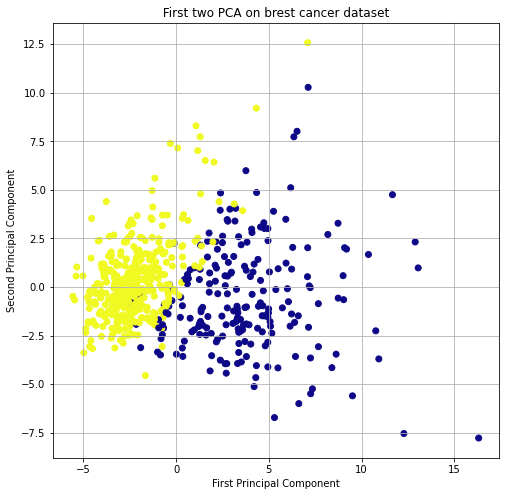

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=cancer['target'],cmap='plasma')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.grid(True)
plt.title(' First two PCA on brest cancer dataset ')

Visualize the important of each feature for each Component of the PCA. We selected just 2 component, so we have PCA(0) and PCA(1), that in order are the two most important component for the dimensionality reduction of the data frame.

The following heatmap will try to interpretate the correlation between different features within the PCA component.

In [17]:
df_comp = pd.DataFrame(pca.components_, columns= cancer['feature_names'])

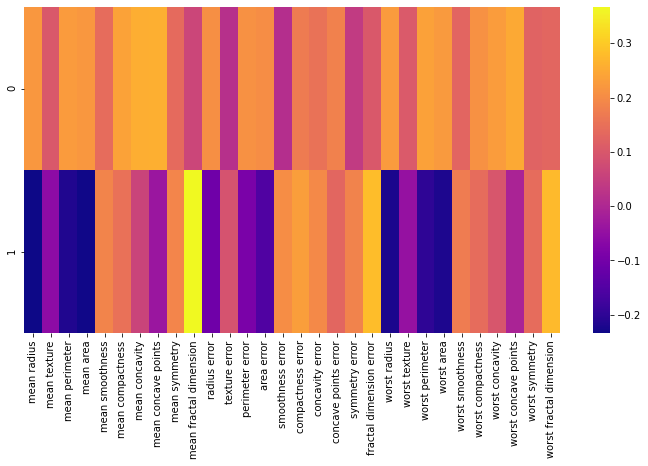

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')